## Extract data from heatmap

![png](../imgs/octopus/target_soc_vs_time.png)

In [1]:
from datetime import time
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st
from scipy.interpolate import interp1d


In [2]:
estimated_heatmap_data = [
    {'deadline': time(4, 0, 0), 'target': 0.8, 'proportion': 0.0025,},
    {'deadline': time(4, 0, 0), 'target': 0.9, 'proportion': 0.0025,},
    {'deadline': time(4, 0, 0), 'target': 1.0, 'proportion': 0.0025,},

    {'deadline': time(4, 30, 0), 'target': 0.8, 'proportion': 0.02,},
    {'deadline': time(4, 30, 0), 'target': 0.9, 'proportion': 0.02,},
    {'deadline': time(4, 30, 0), 'target': 1.0, 'proportion': 0.02,},

    {'deadline': time(5, 0, 0), 'target': 0.7, 'proportion': 0.0025,},
    {'deadline': time(5, 0, 0), 'target': 0.8, 'proportion': 0.0125,},
    {'deadline': time(5, 0, 0), 'target': 0.9, 'proportion': 0.015,},
    {'deadline': time(5, 0, 0), 'target': 1.0, 'proportion': 0.02,},

    {'deadline': time(6, 0, 0), 'target': 0.7, 'proportion': 0.0025,},
    {'deadline': time(6, 0, 0), 'target': 0.8, 'proportion': 0.03,},
    {'deadline': time(6, 0, 0), 'target': 0.9, 'proportion': 0.035,},
    {'deadline': time(6, 0, 0), 'target': 1.0, 'proportion': 0.0375,},

    {'deadline': time(7, 0, 0), 'target': 0.7, 'proportion': 0.0125,},
    {'deadline': time(7, 0, 0), 'target': 0.8, 'proportion': 0.08,},
    {'deadline': time(7, 0, 0), 'target': 0.9, 'proportion': 0.0575,},
    {'deadline': time(7, 0, 0), 'target': 1.0, 'proportion': 0.0525,},

    {'deadline': time(8, 0, 0), 'target': 0.7, 'proportion': 0.0025,},
    {'deadline': time(8, 0, 0), 'target': 0.8, 'proportion': 0.0275,},
    {'deadline': time(8, 0, 0), 'target': 0.9, 'proportion': 0.015,},
    {'deadline': time(8, 0, 0), 'target': 1.0, 'proportion': 0.015,},

    {'deadline': time(9, 0, 0), 'target': 0.8, 'proportion': 0.0075,},
    {'deadline': time(9, 0, 0), 'target': 0.9, 'proportion': 0.0075,},
    {'deadline': time(9, 0, 0), 'target': 1.0, 'proportion': 0.005,},
]


estimated_df = pd.DataFrame(estimated_heatmap_data).pivot(index='target', columns='deadline', values='proportion').fillna(0).sort_values(by='target', ascending=False)

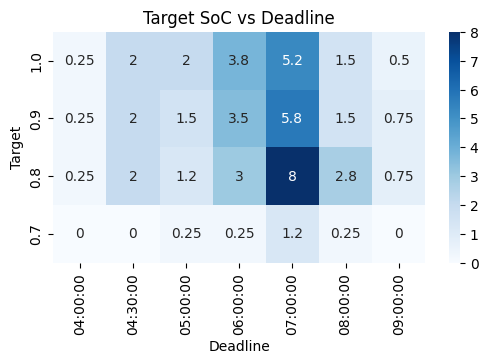

In [3]:
plt.figure(figsize=(6, 3))
sns.heatmap(
    estimated_df*100,
    annot=True,
    cmap='Blues',
)
plt.xlabel('Deadline')
plt.ylabel('Target')
plt.title('Target SoC vs Deadline')
plt.show()

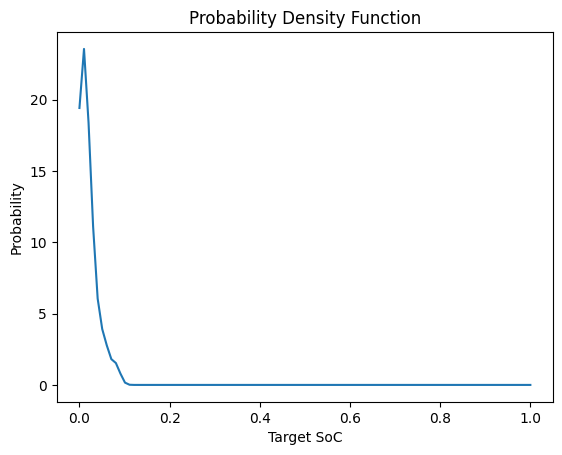

In [4]:
# gaussian kde
kernel = st.gaussian_kde(estimated_df.values.flatten())
x = np.linspace(0, 1, 100)
plt.plot(x, kernel(x))
plt.xlabel('Target SoC')
plt.ylabel('Probability')
plt.title('Probability Density Function')
plt.show()

In [5]:
data = np.random.multivariate_normal((0, 0), [[0.8, 0.05], [0.05, 0.7]], 100)
x = data[:, 0]
y = data[:, 1]
xmin, xmax = -3, 3
ymin, ymax = -3, 3

# Peform the kernel density estimate
xx, yy = np.mgrid[xmin:xmax:100j, ymin:ymax:100j]
positions = np.vstack([xx.ravel(), yy.ravel()])
values = np.vstack([x, y])

In [6]:
values

array([[-1.13911590e+00,  5.64085797e-01,  1.18485748e-01,
         1.14329535e-01, -1.20860301e-01, -1.28113202e+00,
        -4.06676804e-01,  2.81205863e+00, -4.35099863e-02,
        -1.21209218e+00,  1.09676403e+00,  9.25807297e-01,
         1.13846700e+00,  7.08857671e-01,  1.37492535e-01,
        -6.50774394e-02, -1.05151578e-02, -1.12253284e+00,
        -2.43225684e-01,  8.54086978e-02,  6.80133564e-01,
        -1.09914213e+00,  5.44944271e-01,  8.82697068e-01,
         1.35636434e+00,  1.89410330e-01, -1.69240085e+00,
        -1.97036264e+00,  1.49436029e-01,  7.19530777e-01,
         1.56695079e+00,  4.55528653e-01, -2.30892831e-03,
        -2.34816101e-01, -5.62514027e-01,  5.13053489e-01,
        -7.20423333e-01, -5.48299518e-01, -5.63918811e-01,
        -6.72143554e-01,  3.07647649e-01,  6.07334227e-01,
        -3.44718466e-01, -1.18535528e+00, -1.38644030e+00,
         5.96324454e-01, -6.04905856e-01, -1.21157271e-01,
         1.00236703e+00, -4.72132138e-01,  1.06235003e+0

In [65]:
from scipy.stats.sampling import NumericalInversePolynomial
from scipy.stats import norm
class StandardNormal:
    def pdf(self, x):
        return np.exp(-0.5 * x*x)

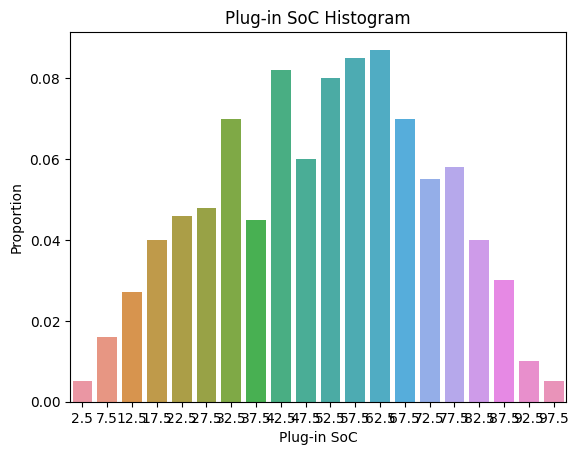

In [66]:
# estimate PDF of plug-in-soc histogram
plug_in_soc_data = {
    2.5: 0.005,
    7.5: 0.016,
    12.5: 0.027,
    17.5: 0.04,
    22.5: 0.046,
    27.5: 0.048,
    32.5: 0.07,
    37.5: 0.045,
    42.5: 0.082,
    47.5: 0.06,
    52.5: 0.08,
    57.5: 0.085,
    62.5: 0.087,
    67.5: 0.07,
    72.5: 0.055,
    77.5: 0.058,
    82.5: 0.04,
    87.5: 0.03,
    92.5: 0.01,
    97.5: 0.005,
}

plug_in_soc_df = pd.DataFrame.from_dict(plug_in_soc_data, orient='index').reset_index()
plug_in_soc_df.columns = ['plug_in_soc', 'proportion']

sns.barplot(x='plug_in_soc', y='proportion', data=plug_in_soc_df)
plt.xlabel('Plug-in SoC')
plt.ylabel('Proportion')
plt.title('Plug-in SoC Histogram')
plt.show()

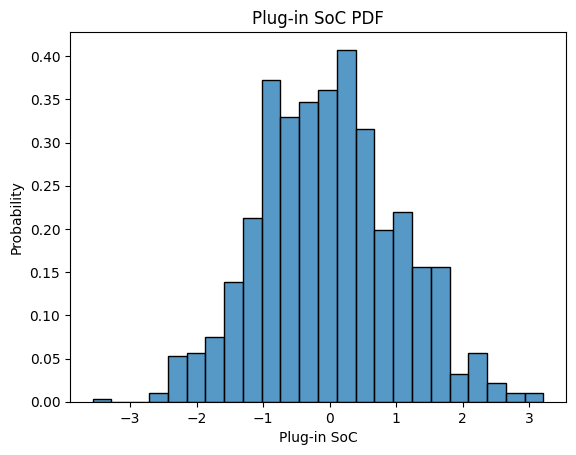

In [68]:
dist = StandardNormal()
urng = np.random.default_rng()
rng = NumericalInversePolynomial(dist, random_state=urng)
x = rng.rvs(size=1000)
sns.histplot(x, stat='density')
plt.xlabel('Plug-in SoC')
plt.ylabel('Probability')
plt.title('Plug-in SoC PDF')
plt.show()

In [8]:
mean = (plug_in_soc_df['plug_in_soc'] * plug_in_soc_df['proportion']).sum()
std = np.sqrt((plug_in_soc_df['plug_in_soc']**2 * plug_in_soc_df['proportion']).sum() - mean**2)
median = plug_in_soc_df['plug_in_soc'].median()
print('mean: ', mean, 'std: ', std)

mean:  48.8925 std:  23.23827002489644


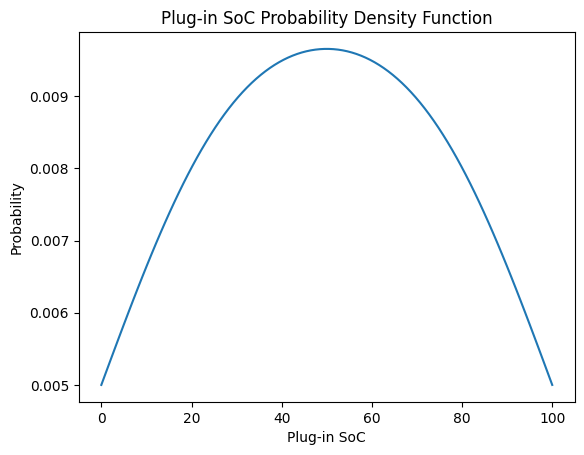

In [51]:
# estimate PDF of plug-in-soc as a normal distribution
plug_in_soc_kernel = st.gaussian_kde(plug_in_soc_df['plug_in_soc'].values.flatten(), bw_method=0.8)
x = np.linspace(0, 100, 100)
plt.plot(x, plug_in_soc_kernel(x))
plt.xlabel('Plug-in SoC')
plt.ylabel('Probability')
plt.title('Plug-in SoC Probability Density Function')
plt.show()

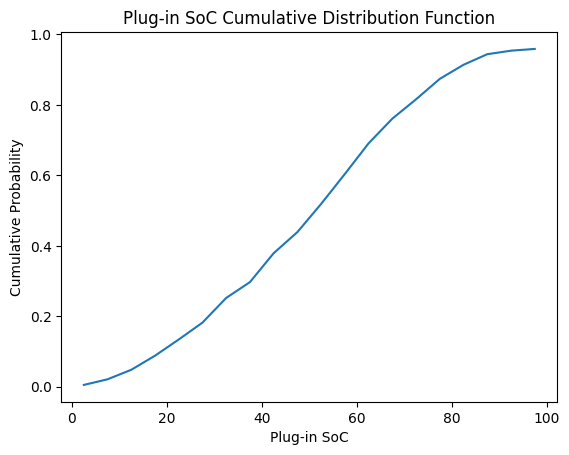

In [10]:
# cumulative distribution function
plug_in_soc_cdf = np.cumsum(plug_in_soc_df['proportion'].values.flatten())
plt.plot(plug_in_soc_df['plug_in_soc'].values.flatten(), plug_in_soc_cdf)
plt.xlabel('Plug-in SoC')
plt.ylabel('Cumulative Probability')
plt.title('Plug-in SoC Cumulative Distribution Function')
plt.show()


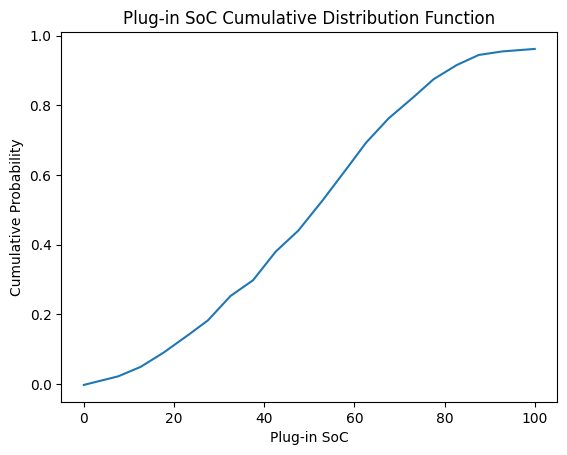

In [45]:
# interpolate plug_in_soc_cdf
plug_in_soc_cdf_interp = interp1d(plug_in_soc_df['plug_in_soc'].values.flatten(), plug_in_soc_cdf, kind='linear', fill_value='extrapolate')
# plot
x = np.linspace(0, 100, 1000)
plt.plot(x, plug_in_soc_cdf_interp(x))
plt.xlabel('Plug-in SoC')
plt.ylabel('Cumulative Probability')
plt.title('Plug-in SoC Cumulative Distribution Function')
plt.show()

ValueError: Either of the methods `pdf` or `logpdf` must be specified for the distribution object `dist`.

In [27]:
plug_in_soc_cdf

array([0.005, 0.021, 0.048, 0.088, 0.134, 0.182, 0.252, 0.297, 0.379,
       0.439, 0.519, 0.604, 0.691, 0.761, 0.816, 0.874, 0.914, 0.944,
       0.954, 0.959])

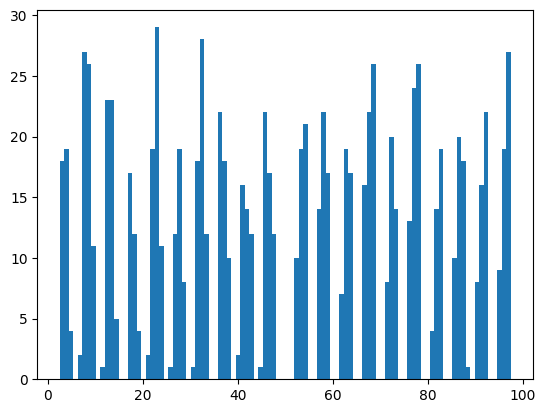

In [34]:
# inverse transform sampling
def inverse_transform_sampling(data, n_bins=40, n_samples=1000):
    hist, bin_edges = np.histogram(data, bins=n_bins, density=True)
    cum_values = np.zeros(bin_edges.shape)
    cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
    inv_cdf = interp1d(cum_values, bin_edges)
    r = np.random.rand(n_samples)
    return inv_cdf(r)

samples = inverse_transform_sampling(plug_in_soc_df['plug_in_soc'].values.flatten())
plt.hist(samples, bins=100)
plt.show()


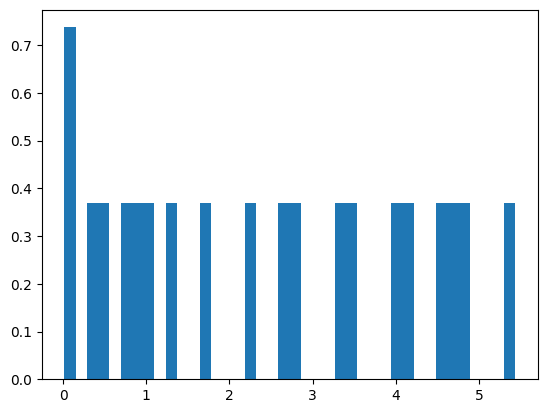

In [38]:
hist, bin_edges = np.histogram(plug_in_soc_df['plug_in_soc'].values.flatten(), bins=40, density=True)
cum_values = np.zeros(bin_edges.shape)
cum_values[1:] = np.cumsum(hist*np.diff(bin_edges))
inv_cdf = interp1d(cum_values, bin_edges)
r = np.random.rand(1000)
inv_cdf(r)

# plot hist
plt.hist(plug_in_soc_df['plug_in_soc'] * plug_in_soc_df['proportion'].values.flatten(), bins=40, density=True)
plt.show()

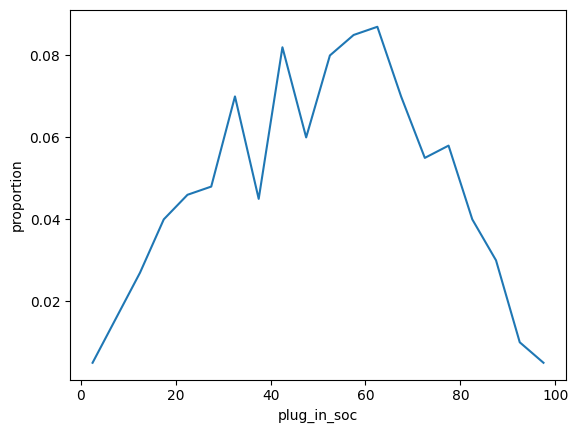

In [40]:
sns.lineplot(x='plug_in_soc', y='proportion', data=plug_in_soc_df)
plt.show()